In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
experimento = "experimento1 images"
dataset_path = f"/home/mitchellmirano/Desktop/MitchellProjects/H vs J phase diagram/{experimento}"
results_path = "/home/mitchellmirano/Desktop/MitchellProjects/TesisMaestria/results/SkyrmionClassifier"

In [5]:
df_vit = pd.read_excel(Path(results_path)/f'predictions/HvsJ_vit_inference_{experimento}.xlsx')
df_vit.head()

,experimento,image,N,K,T,H,J2,F,S,Sk,V,id,label
0,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6272727272727273 ...,547,0.1,0.01,1.757576,0.627273,0.571,0.198,0.130,0.102,0,F
1,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5060606060606061 ...,547,0.1,0.01,0.787879,0.506061,0.575,0.195,0.128,0.102,0,F
2,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8333333333333333 ...,547,0.1,0.01,0.000000,0.833333,0.256,0.328,0.235,0.181,1,S
3,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8878787878787879 ...,547,0.1,0.01,1.787879,0.887879,0.150,0.287,0.323,0.240,2,Sk
4,experimento1 images,skyrmionsPlot N = 547 J2 = 0.43333333333333335...,547,0.1,0.01,1.090909,0.433333,0.576,0.194,0.128,0.101,0,F


In [6]:
df_cnn = pd.read_excel(Path(results_path)/f'predictions/HvsJ_cnn_inference_{experimento}.xlsx')
df_cnn.head()

,experimento,image,N,K,T,H,J2,F,S,Sk,V,id,label
0,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6272727272727273 ...,547,0.1,0.01,1.757576,0.627273,0.999,0.000,0.000,0.001,0,F
1,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5060606060606061 ...,547,0.1,0.01,0.787879,0.506061,0.998,0.000,0.000,0.002,0,F
2,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8333333333333333 ...,547,0.1,0.01,0.000000,0.833333,0.000,0.995,0.005,0.000,1,S
3,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8878787878787879 ...,547,0.1,0.01,1.787879,0.887879,0.002,0.000,0.002,0.996,3,V
4,experimento1 images,skyrmionsPlot N = 547 J2 = 0.43333333333333335...,547,0.1,0.01,1.090909,0.433333,0.999,0.000,0.000,0.001,0,F


In [7]:
df = pd.merge(df_vit, df_cnn, on=["experimento", "image", "N", "K", "T", "H", "J2"], how="inner", suffixes=("_vit", "_cnn"))
df["is_equal"] = df["label_vit"] == df["label_cnn"]
df

,experimento,image,N,K,T,H,J2,F_vit,S_vit,Sk_vit,V_vit,id_vit,label_vit,F_cnn,S_cnn,Sk_cnn,V_cnn,id_cnn,label_cnn,is_equal
0,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6272727272727273 ...,547,0.1,0.01,1.757576,0.627273,0.571,0.198,0.130,0.102,0,F,0.999,0.000,0.000,0.001,0,F,True
1,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5060606060606061 ...,547,0.1,0.01,0.787879,0.506061,0.575,0.195,0.128,0.102,0,F,0.998,0.000,0.000,0.002,0,F,True
2,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8333333333333333 ...,547,0.1,0.01,0.000000,0.833333,0.256,0.328,0.235,0.181,1,S,0.000,0.995,0.005,0.000,1,S,True
3,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8878787878787879 ...,547,0.1,0.01,1.787879,0.887879,0.150,0.287,0.323,0.240,2,Sk,0.002,0.000,0.002,0.996,3,V,False
4,experimento1 images,skyrmionsPlot N = 547 J2 = 0.43333333333333335...,547,0.1,0.01,1.090909,0.433333,0.576,0.194,0.128,0.101,0,F,0.999,0.000,0.000,0.001,0,F,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5666666666666667 ...,547,0.1,0.01,0.212121,0.566667,0.156,0.279,0.375,0.190,2,Sk,0.000,0.006,0.989,0.005,2,Sk,True
9996,experimento1 images,skyrmionsPlot N = 547 J2 = 0.4696969696969696 ...,547,0.1,0.01,0.060606,0.469697,0.210,0.399,0.214,0.177,1,S,0.000,0.816,0.184,0.000,1,S,True
9997,experimento1 images,skyrmionsPlot N = 547 J2 = 0.3303030303030303 ...,547,0.1,0.01,1.393939,0.330303,0.574,0.194,0.130,0.101,0,F,0.999,0.000,0.000,0.001,0,F,True
9998,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6393939393939394 ...,547,0.1,0.01,0.606061,0.639394,0.162,0.278,0.370,0.189,2,Sk,0.000,0.006,0.637,0.357,2,Sk,True


In [8]:
ddf = df[df["is_equal"] == False].copy()
ddf["image_path"] = [Path(dataset_path)/i for i in ddf["image"]]
ddf

,experimento,image,N,K,T,H,J2,F_vit,S_vit,Sk_vit,...,id_vit,label_vit,F_cnn,S_cnn,Sk_cnn,V_cnn,id_cnn,label_cnn,is_equal,image_path
3,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8878787878787879 ...,547,0.1,0.01,1.787879,0.887879,0.150,0.287,0.323,...,2,Sk,0.002,0.0,0.002,0.996,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
7,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8515151515151516 ...,547,0.1,0.01,2.090909,0.851515,0.227,0.342,0.259,...,1,S,0.019,0.0,0.001,0.981,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
11,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8636363636363638 ...,547,0.1,0.01,2.484848,0.863636,0.452,0.282,0.155,...,0,F,0.433,0.0,0.000,0.567,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
16,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6757575757575758 ...,547,0.1,0.01,0.696970,0.675758,0.154,0.238,0.321,...,2,Sk,0.000,0.0,0.010,0.990,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
20,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8151515151515152 ...,547,0.1,0.01,1.363636,0.815152,0.180,0.261,0.328,...,2,Sk,0.000,0.0,0.000,1.000,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,experimento1 images,skyrmionsPlot N = 547 J2 = 0.803030303030303 K...,547,0.1,0.01,0.787879,0.803030,0.185,0.312,0.275,...,1,S,0.000,0.0,0.999,0.001,2,Sk,False,/home/mitchellmirano/Desktop/MitchellProjects/...
9977,experimento1 images,skyrmionsPlot N = 547 J2 = 0.7787878787878788 ...,547,0.1,0.01,1.606061,0.778788,0.212,0.344,0.247,...,1,S,0.013,0.0,0.001,0.986,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
9978,experimento1 images,skyrmionsPlot N = 547 J2 = 0.8151515151515152 ...,547,0.1,0.01,1.909091,0.815152,0.248,0.347,0.228,...,1,S,0.040,0.0,0.001,0.959,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...
9981,experimento1 images,skyrmionsPlot N = 547 J2 = 0.796969696969697 K...,547,0.1,0.01,1.878788,0.796970,0.288,0.371,0.202,...,1,S,0.004,0.0,0.000,0.996,3,V,False,/home/mitchellmirano/Desktop/MitchellProjects/...


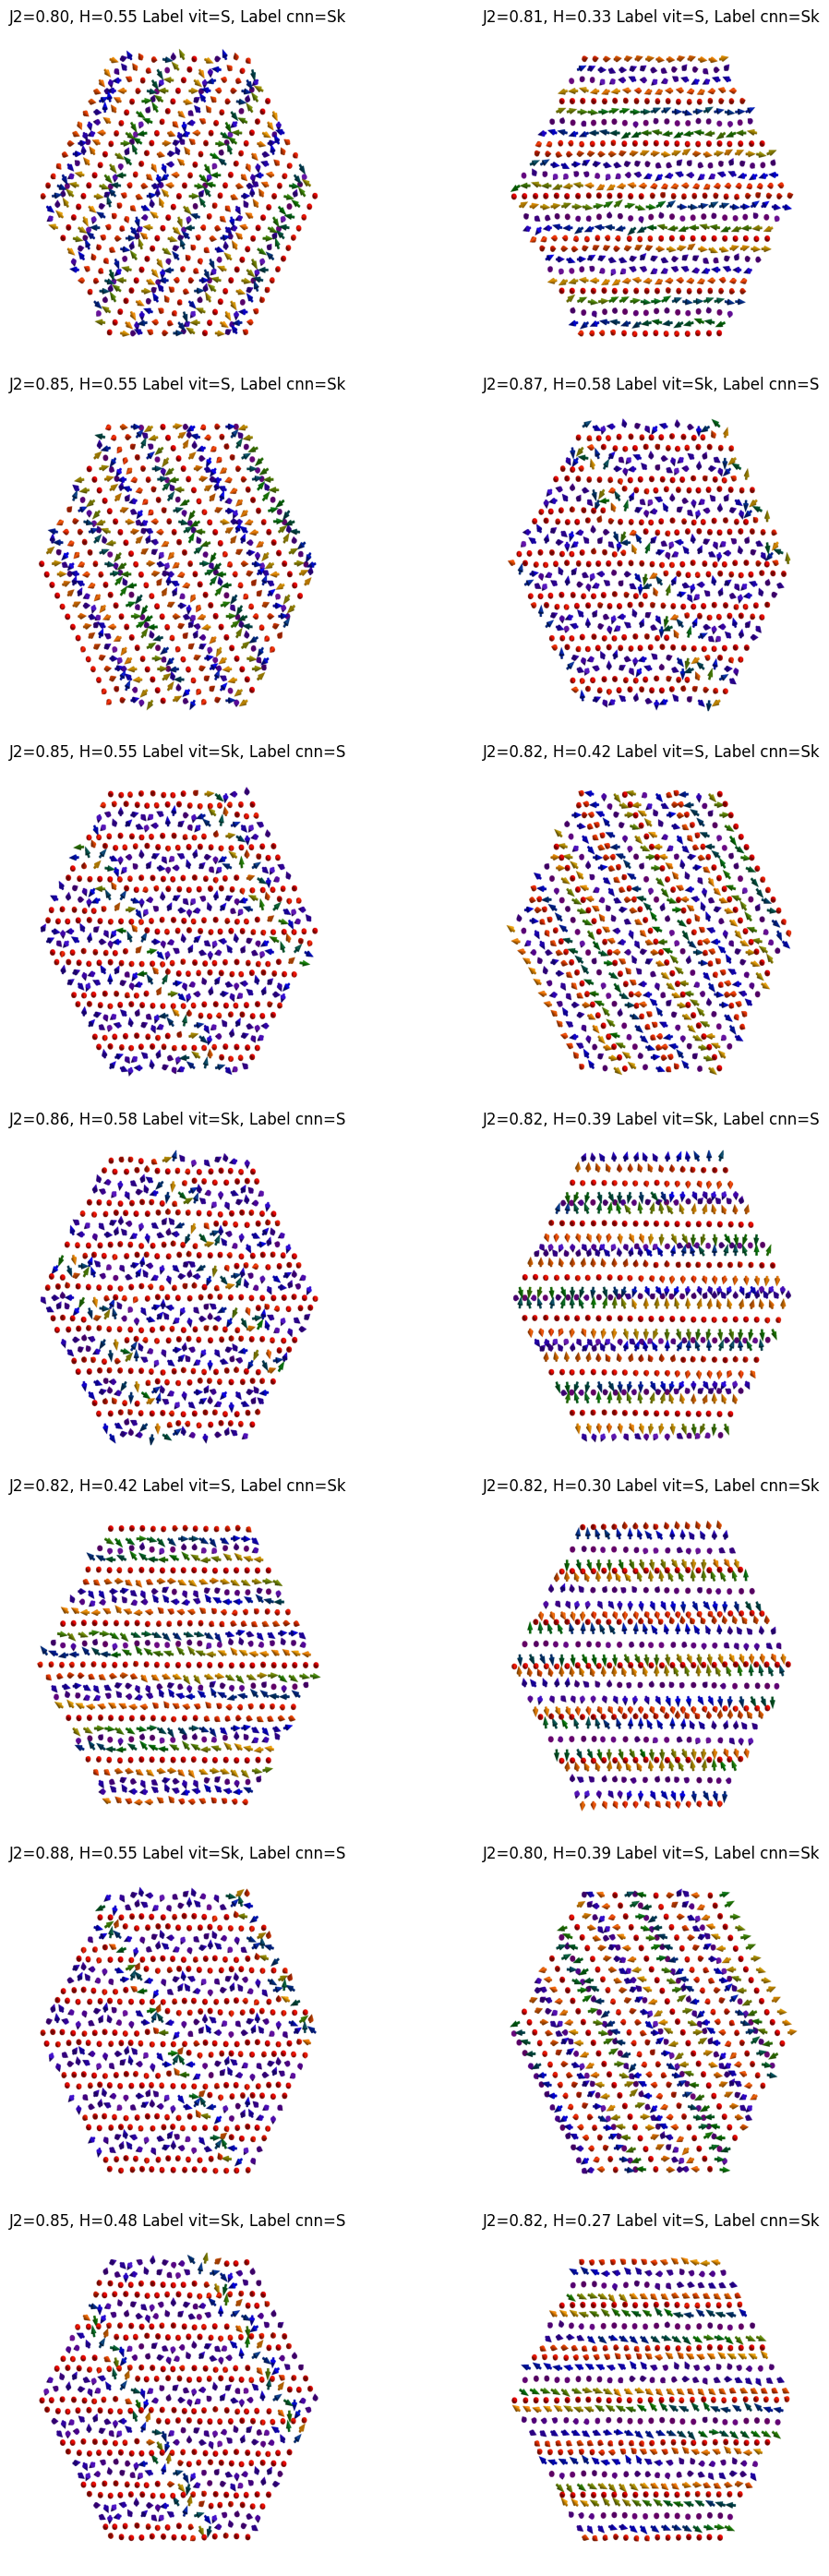

In [9]:
test_df=ddf[ (ddf["H"]<0.6) & (ddf["J2"]>=0.8)].copy()

fig, ax = plt.subplots(len(test_df)//2, 2, figsize=(12, 2*len(test_df)))
for i, (index, row) in enumerate(test_df.iterrows()):
    ax[i//2, i%2].imshow(Image.open(row['image_path']))
    ax[i//2, i%2].set_title(f"J2={row['J2']:.2f}, H={row['H']:.2f} Label vit={row['label_vit']}, Label cnn={row['label_cnn']}")
    ax[i//2, i%2].axis('off')
plt.tight_layout()

In [10]:
colors = {
    "F": "#3498DB",  # Azul celestial
    "S": "#E74C3C",  # Rojo carmesí
    "Sk": "#2ECC71",  # Verde lima
    "V": "#F1C40F"   # Amarillo naranja
}

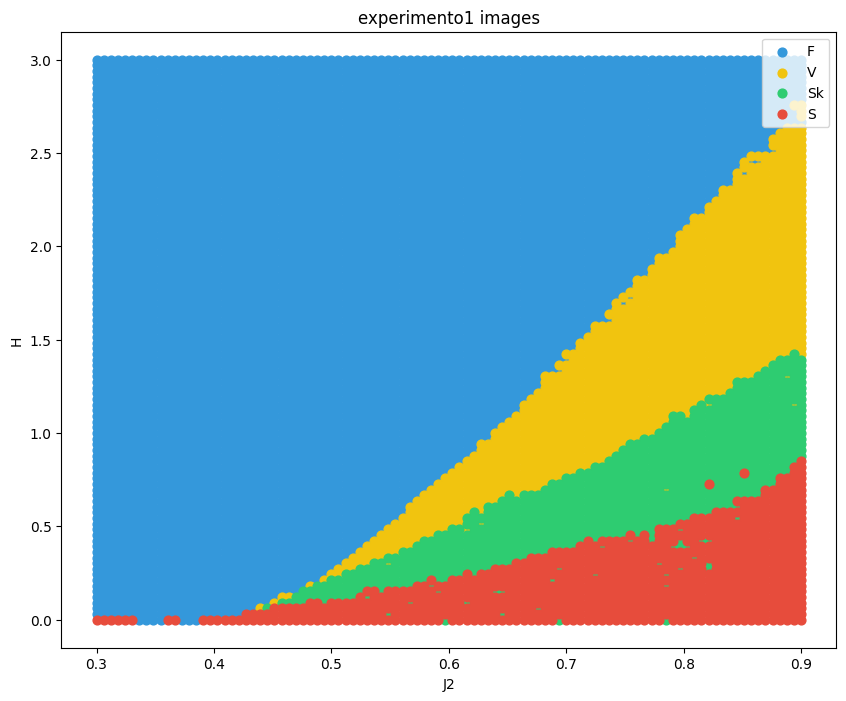

In [11]:
plt.figure(figsize=(10, 8))

for label, count in df_cnn['label'].value_counts( ascending=False).items():
    subset = df_cnn[df_cnn['label'] == label]
    plt.scatter(subset['J2'], subset['H'], label=label, s=40, color=colors[label])
    
plt.xlabel('J2')
plt.ylabel('H')
plt.title(experimento)
plt.legend()
plt.savefig(Path(results_path)/f'predictions/HvsJ_cnn_inference_{experimento}.png')
plt.show()

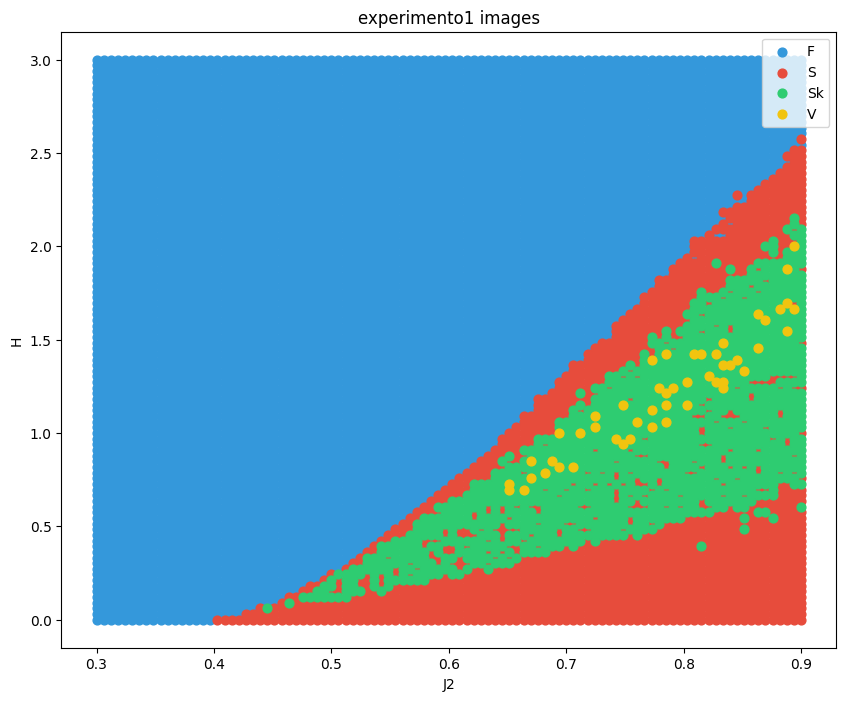

In [12]:
plt.figure(figsize=(10, 8))

for label, count in df_vit['label'].value_counts( ascending=False).items():
    subset = df_vit[df_vit['label'] == label]
    plt.scatter(subset['J2'], subset['H'], label=label, s=40, color=colors[label])
    
plt.xlabel('J2')
plt.ylabel('H')
plt.title(experimento)
plt.legend()
plt.savefig(Path(results_path)/f'predictions/HvsJ_cnn_inference_{experimento}.png')
plt.show()

In [13]:
len(df[df["is_equal"] == False]),len(ddf)

(1654, 1654)

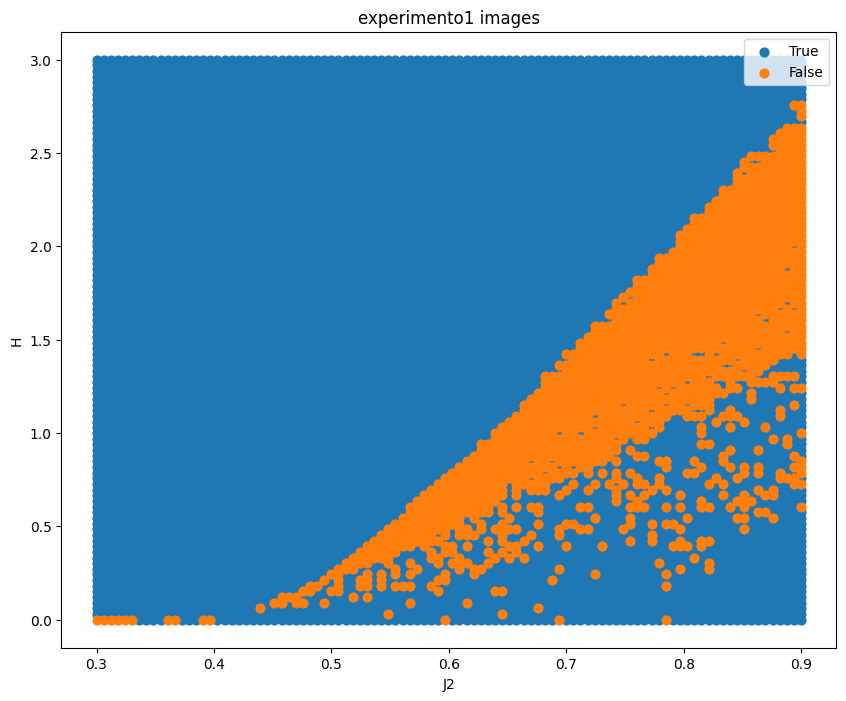

In [14]:
plt.figure(figsize=(10, 8))

for label, count in df['is_equal'].value_counts( ascending=False).items():
    subset = df[df['is_equal'] == label]
    plt.scatter(subset['J2'], subset['H'], label=label, s=40)
    
plt.xlabel('J2')
plt.ylabel('H')
plt.title(experimento)
plt.legend()
plt.savefig(Path(results_path)/f'predictions/HvsJ_cnn_inference_{experimento}.png')
plt.show()